In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("house_rentle.csv")

In [3]:
data.shape

(645, 8)

In [4]:
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [7]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [9]:
data["Floor"].value_counts()

2     103
5      88
4      75
6      75
3      69
7      42
8      36
10     34
9      26
1      22
11     19
13     14
12     13
19      7
14      6
15      4
21      4
18      3
16      2
17      2
22      1
Name: Floor, dtype: int64

In [10]:
data["TotalFloor"].value_counts()

7     161
12    113
14     68
4      36
6      36
9      30
5      30
13     30
15     28
21     18
19     17
11     16
16     13
25     10
17      8
18      8
10      8
24      4
8       3
20      2
27      2
3       1
38      1
26      1
1       1
Name: TotalFloor, dtype: int64

In [11]:
data["Bedroom"].value_counts()

3    239
2    161
4    161
1     69
5     13
6      1
7      1
Name: Bedroom, dtype: int64

In [12]:
data["Living.Room"].value_counts()

2    509
1    118
3     10
0      7
4      1
Name: Living.Room, dtype: int64

In [13]:
data["Bathroom"].value_counts()

2    386
1    198
3     46
4     10
5      4
0      1
Name: Bathroom, dtype: int64

In [14]:
data.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [15]:
#checking any null values
pd.isnull(data).any()

Sqft           False
Floor          False
TotalFloor     False
Bedroom        False
Living.Room    False
Bathroom       False
Price          False
dtype: bool

<AxesSubplot:>

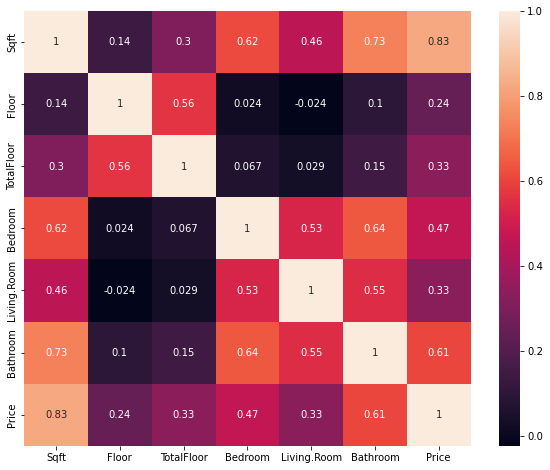

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

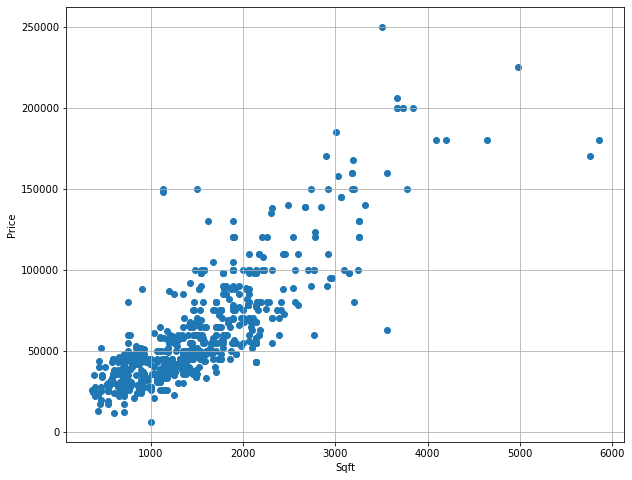

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(data["Sqft"],data["Price"])
plt.xlabel("Sqft")
plt.ylabel("Price")
plt.grid()
plt.show()

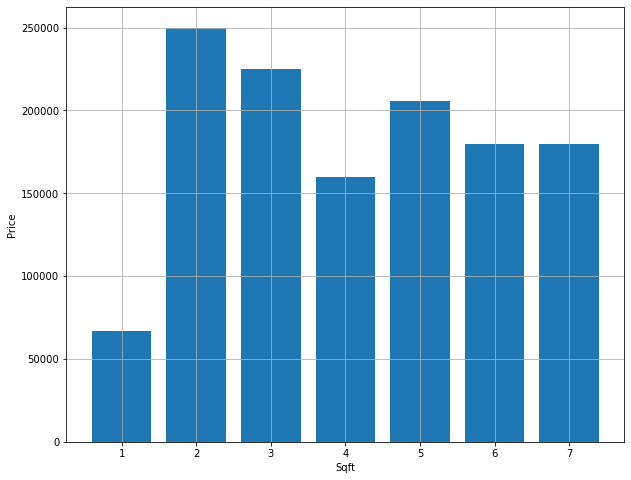

In [18]:
plt.figure(figsize=(10,8))
plt.bar(data["Bedroom"],data["Price"])
plt.xlabel("Sqft")
plt.ylabel("Price")
plt.grid()
plt.show()

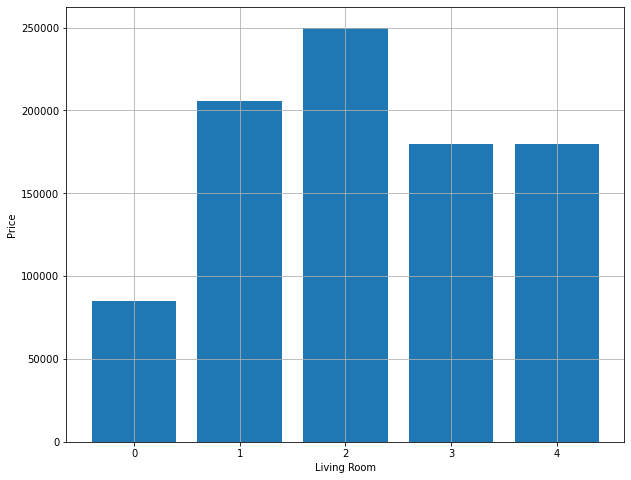

In [19]:
plt.figure(figsize=(10,8))
plt.bar(data["Living.Room"],data["Price"])
plt.xlabel("Living Room")
plt.ylabel("Price")
plt.grid()
plt.show()

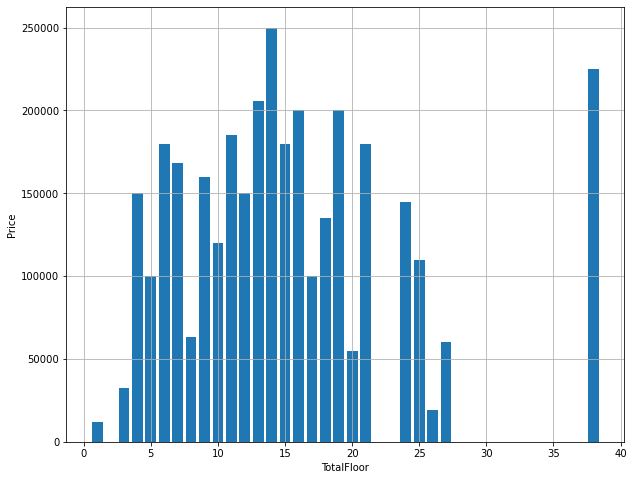

In [20]:
plt.figure(figsize=(10,8))
plt.bar(data["TotalFloor"],data["Price"])
plt.xlabel("TotalFloor")
plt.ylabel("Price")
plt.grid()
plt.show()

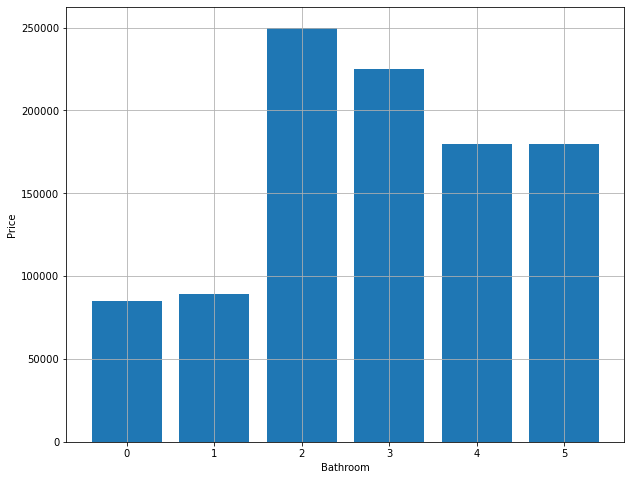

In [21]:
plt.figure(figsize=(10,8))
plt.bar(data["Bathroom"],data["Price"])
plt.xlabel("Bathroom")
plt.ylabel("Price")
plt.grid()
plt.show()

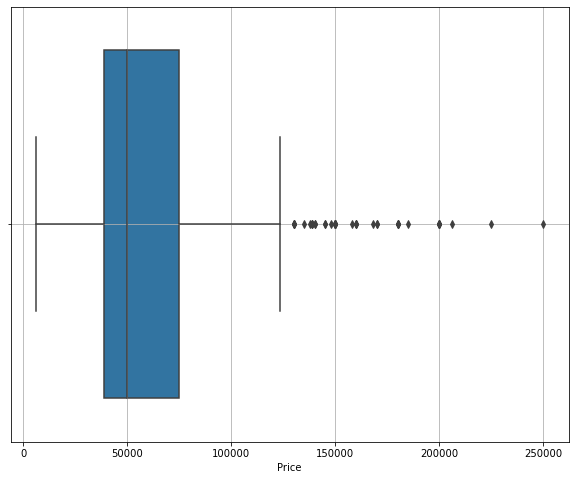

In [23]:
#for outliers
plt.figure(figsize=(10,8))
sns.boxplot(x=data["Price"])
plt.grid()

In [24]:
minimum=data["Price"].quantile(.10)
maximum=data["Price"].quantile(.90)

print(minimum,maximum)

30000.0 100000.0


In [25]:
data.shape

(645, 7)

In [27]:
data2=data[(data["Price"]<maximum) & (data["Price"]>minimum)]

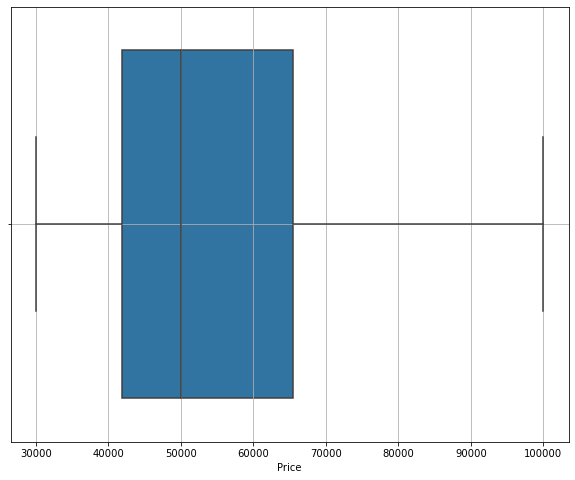

In [28]:
#after removing outliers
plt.figure(figsize=(10,8))
sns.boxplot(x=data2["Price"])
plt.grid()

In [50]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [51]:
#for standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [52]:
# for best neighbor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,KFold
x_axis=[]
y_axis=[]
for i in range(1,26,2):
    reg=KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(reg,x_train,y_train,cv=KFold(n_splits=5))
    x_axis.append(i)

ValueError: x and y must have same first dimension, but have shapes (13,) and (0,)

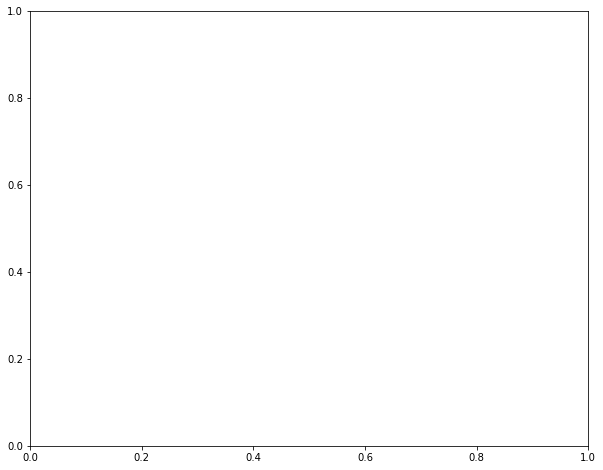

In [53]:
#plot for best neighbor
plt.figure(figsize=(10,8))
plt.plot(x_axis,y_axis)
plt.xlabel("Number of neighbors")
plt.ylabel("Score on training data")
plt.grid()
plt.show()

In [54]:
#from plot we are getting highest accurcy at neighbor =7
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor(n_neighbors=7)
reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [55]:
y_pred=reg.predict(x_test)